# <font color=deeppink>**Data Preparation**</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color=royalblue>Load Necessary Libraries</font>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import csv
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split

## <font color=royalblue>Pertinent Functions</font>

In [ ]:
def checkForMissing(ListOfColumns):
    columnsMissingData = []
    
    for column in ListOfColumns:
        # Check if Column Contains Unknown Values
        if len(data[data[column] == -1]) > 0:
            # Add Column's Name to the List
            columnsMissingData.append(column)

    return columnsMissingData

# Compute the Optimal Number of Bins for the Histogram
def computeNumberofBins(column):
    # Numerator
    maximum = column.max()
    minimum = column.min()
    
    numerator = maximum - minimum
    
    # Denominator
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    
    IQR = q3 - q1
    
    n = len(column)
    
    denominator = 2 * IQR * (n**(-1/3))
    
    nbins = numerator/denominator
    
    # Return the Integer Ceiling of the Computed Value
    return int(np.ceil(nbins))

## <font color=royalblue>Read In Data</font>

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Thesis/Codes/Preparation Datasets/cjb_thesis_dataset.csv", index_col="ID")
data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_MurdersCateg,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS
ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,1,1,...,High,Low,High,High,High,High,Low,High,3.922676,19.596591
1,1,0,0,0,1,0,0,0,0,1,...,High,Low,High,High,Low,Low,Low,High,0.677924,2.130889
2,1,1,0,0,0,0,0,0,0,1,...,High,Low,High,Low,Low,High,Low,High,1.050270,111.509517
3,1,0,0,0,1,0,0,0,0,1,...,High,High,High,High,High,High,Low,High,2.263438,18.169620
4,1,0,0,0,1,0,0,0,0,2,...,High,High,High,High,High,High,Low,High,1.611439,3.422135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,0,0,0,1,0,0,0,0,1,...,High,Low,High,High,High,High,Low,High,21.119729,6.756697
142,1,1,0,0,0,1,0,1,0,1,...,High,Low,High,High,Low,High,Low,High,3.867340,18.598110
143,0,1,0,0,0,1,0,1,0,1,...,High,Low,High,High,High,High,Low,High,1.338182,17.132149


## <font color=royalblue>Inspect for Missing Values</font>

In [ ]:
# Comprehensive List of All 53 Categorical Variables
categoricals = ["Gender", "Hispanic", "AmerInd", "Asian", "Black", "White", "Hawaiian", "Multinational", "LimitedEnglish", 
                "Eligibility", "AcademNeed", "Disconnected", "Grade_EnteredUB", "Participation", "AcademAch_ELA", 
                "AcademAch_Math", "Employed", "CulturalAct", "CommServ", "LEPServs", "AP", "Honors", "Cert_or_Diploma", 
                "AssocDeg", "BachDeg", "PS_Graduated", "STEMDeg", "HS_SchoolName", "Charter", "Magnet", "Title1_School", 
                "Title1_SchoolWide", "PS_SchoolName", "HS_TotalCrimesCateg", "HS_PersonalCrimesCateg", "HS_MurdersCateg",
                "HS_RapesCateg", "HS_RobberiesCateg", "HS_AssaultsCateg", "HS_PropertyCrimesCateg", "HS_BurglariesCateg",
                "HS_LarceniesCateg", "HS_VehicleTheftsCateg", "Student_TotalCrimesCateg", "Student_PersonalCrimesCateg", 
                "Student_MurdersCateg", "Student_RapesCateg", "Student_RobberiesCateg", "Student_AssaultsCateg", 
                "Student_PropertyCrimesCateg", "Student_BurglariesCateg", "Student_LarceniesCateg", 
                "Student_VehicleTheftsCateg"]

# Comprehensive List of All 50 Continuous Variables
continuous = ["GPA", "HSGrad_Age", "Absences", "SAT_Reading", "SAT_Math", "SAT_Writing", "NumStudents", "NumTeachers", 
              "StudentTeacherRatio", "NumFreeLunch", "NumReducedLunch", "%_Female", "%_Male", "%_EconomDisadv", 
              "%_w/Disabilities", "%_ELL", "%_Homeless", "%_FosterCare", "%_White", "%_Hispanic", "%_Black", "%_Asian", 
              "%_Hawaiian", "%_AmericanIndian", "HS_CrimesIndex_2020", "HS_PersonalCrimesIndex_2020", "HS_MurdersIndex_2020",
              "HS_RapesIndex_2020", "HS_RobberiesIndex_2020", "HS_AssaultsIndex_2020", "HS_PropertyCrimesIndex_2020",
              "HS_BurglariesIndex_2020", "HS_LarceniesIndex_2020", "HS_VehicleTheftsIndex_2020", "HS_AreaPopulation_2020", 
              "HS_Area", "Student_CrimesIndex_2020", "Student_PersonalCrimesIndex_2020", "Student_MurdersIndex_2020", 
              "Student_RapesIndex_2020", "Student_RobberiesIndex_2020", "Student_AssaultsIndex_2020", 
              "Student_PropertyCrimesIndex_2020", "Student_BurglariesIndex_2020", "Student_LarceniesIndex_2020", 
              "Student_VehicleTheftsIndex_2020", "Student_AreaPopulation_2020", "Student_Area", "Distance_to_HS", 
              "Distance_to_PS"]

# Lists of All Columns Missing Data
categoricals_with_unknowns = []
continuous_with_unknowns = []

# Check Which Columns Are Missing Data
categoricals_with_unknowns = checkForMissing(categoricals)
continuous_with_unknowns = checkForMissing(continuous)

In [ ]:
print("Categorical Variables Missing Values: \n", categoricals_with_unknowns, "\n")
print("Continuous Variables Missing Values: \n", continuous_with_unknowns)

Categorical Variables Missing Values: 
 ['Disconnected', 'AcademAch_ELA', 'AcademAch_Math', 'Employed', 'AP', 'Honors', 'BachDeg', 'STEMDeg'] 

Continuous Variables Missing Values: 
 ['Absences', 'SAT_Reading', 'SAT_Math', 'SAT_Writing']


#### <font color=darkviolet>Categorical Variables</font>


##### <font color=mediumorchid>Check the Value Counts of These Variables</font>

In [ ]:
for column in categoricals_with_unknowns:
    print(column)
    print(data[column].value_counts(), "\n")

Disconnected
-1    87
 9    57
 0     2
Name: Disconnected, dtype: int64 

AcademAch_ELA
 1    140
 2      3
-1      2
 9      1
Name: AcademAch_ELA, dtype: int64 

AcademAch_Math
 1    136
 2      5
-1      2
 0      2
 9      1
Name: AcademAch_Math, dtype: int64 

Employed
 0    59
 9    49
-1    25
 1    13
Name: Employed, dtype: int64 

AP
 1    92
 0    53
-1     1
Name: AP, dtype: int64 

Honors
 1    128
 0     17
-1      1
Name: Honors, dtype: int64 

BachDeg
 1    75
 7    41
 2    17
 6    12
-1     1
Name: BachDeg, dtype: int64 

STEMDeg
 0    87
 1    35
 2    12
 9    10
-1     2
Name: STEMDeg, dtype: int64 



In [ ]:
# Since the Majority of the "Disconnected" Values Are Missing, We Should Drop This Column From Our Dataset
print("Shape of Dataset Before Dropping: ", data.shape)
data.drop("Disconnected", axis=1, inplace=True)

# Verify the Column Was Dropped
print("Shape of Dataset After Dropping: ", data.shape)

categoricals_with_unknowns.remove("Disconnected")

Shape of Dataset Before Dropping:  (146, 107)
Shape of Dataset After Dropping:  (146, 106)


##### <font color=mediumorchid>Fill in the Missing Values</font>

In [ ]:
for column in categoricals_with_unknowns:
    # Replace with the Most Frequent Category
    new_value = data[column].value_counts().index[0]

    data[column].replace(-1, new_value, inplace=True)

#### <font color=darkviolet>Continuous Variables</font>

In [ ]:
continuousMissingValues_dict = {}

##### <font color=mediumorchid>`Absences`</font>

In [ ]:
Absences_NonMissing = data.Absences[data.Absences > -1]
len(Absences_NonMissing)

104

In [ ]:
nbins_Absences = computeNumberofBins(Absences_NonMissing)
nbins_Absences

12

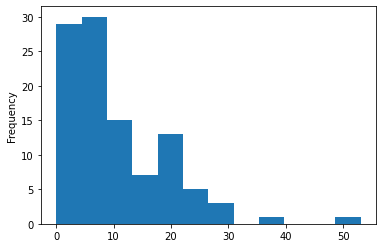

In [ ]:
Absences_NonMissing.plot.hist(bins=nbins_Absences)

In [ ]:
Absences_NonMissing.mean()

10.221153846153847

In [ ]:
Absences_NonMissing.median()

7.0

In [ ]:
Absences_NonMissing.value_counts().index[0]

6

In [ ]:
skew(Absences_NonMissing)

1.6566091581038471

In [ ]:
# Since the Distribution of "Absences" Is Skewed, We Should Replace Missing Values with the Median
continuousMissingValues_dict["Absences"] = int(Absences_NonMissing.median())

##### <font color=mediumorchid>`SAT_Reading`</font>

In [ ]:
Reading_NonMissing = data.SAT_Reading[data.SAT_Reading > -1]
len(Reading_NonMissing)

76

In [ ]:
nbins_SAT_Reading = computeNumberofBins(Reading_NonMissing)
nbins_SAT_Reading

9

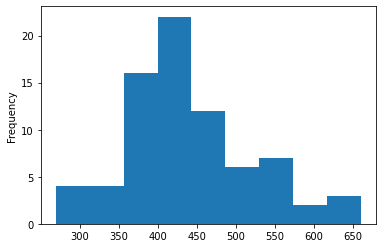

In [ ]:
Reading_NonMissing.plot.hist(bins=nbins_SAT_Reading)

In [ ]:
Reading_NonMissing.mean()

438.1578947368421

In [ ]:
Reading_NonMissing.median()

420.0

In [ ]:
Reading_NonMissing.value_counts().index[0]

420

In [ ]:
skew(Reading_NonMissing)

0.6461647720520508

In [ ]:
# Since the Distribution of "SAT_Reading" Is Moderately Skewed, We Should Replace Missing Values with the Median
continuousMissingValues_dict["SAT_Reading"] = int(Reading_NonMissing.median())

##### <font color=mediumorchid>`SAT_Math`</font>

In [ ]:
Math_NonMissing = data.SAT_Math[data.SAT_Math > -1]
len(Math_NonMissing)

76

In [ ]:
nbins_SAT_Math = computeNumberofBins(Math_NonMissing)
nbins_SAT_Math

10

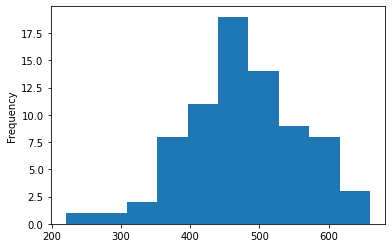

In [ ]:
Math_NonMissing.plot.hist(bins=nbins_SAT_Math)

In [ ]:
Math_NonMissing.mean()

477.2368421052632

In [ ]:
Math_NonMissing.median()

470.0

In [ ]:
Math_NonMissing.value_counts().index[0]

440

In [ ]:
skew(Math_NonMissing)

-0.13309060962677174

In [ ]:
# Since the Distribution of "SAT_Math" Is Relatively Normal, We Should Replace Missing Values with the Mean
continuousMissingValues_dict["SAT_Math"] = int(Math_NonMissing.mean())

##### <font color=mediumorchid>`SAT_Writing`</font>

In [ ]:
Writing_NonMissing = data.SAT_Writing[data.SAT_Writing > -1]
len(Writing_NonMissing)

75

In [ ]:
nbins_SAT_Writing = computeNumberofBins(Writing_NonMissing)
nbins_SAT_Writing

9

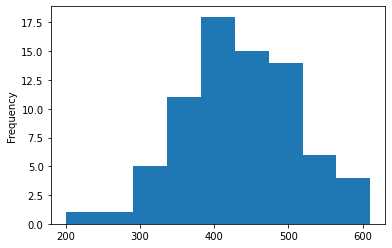

In [ ]:
Writing_NonMissing.plot.hist(bins=nbins_SAT_Writing)

In [ ]:
Writing_NonMissing.mean()

434.0

In [ ]:
Writing_NonMissing.median()

430.0

In [ ]:
Writing_NonMissing.value_counts().index[0]

490

In [ ]:
skew(Writing_NonMissing)

-0.13099798373563076

In [ ]:
# Since the Distribution of "SAT_Writing" Is Relatively Normal, We Should Replace Missing Values with the Mean
continuousMissingValues_dict["SAT_Writing"] = int(Writing_NonMissing.mean())

##### <font color=mediumorchid>Fill in the Missing Values</font>

In [ ]:
for column in continuous_with_unknowns:
    # Replace with the Previously Determined Value
    new_value = continuousMissingValues_dict[column]
    
    data[column].replace(-1, new_value, inplace=True)

##### <font color=mediumorchid>`GPA`</font>

In [ ]:
GPA_NonMissing = data.GPA[data.GPA < 9.999]
len(GPA_NonMissing)

137

In [ ]:
nbins_GPA = computeNumberofBins(GPA_NonMissing)
nbins_GPA

9

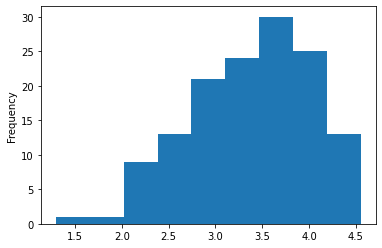

In [ ]:
GPA_NonMissing.plot.hist(bins=nbins_GPA)

In [ ]:
GPA_NonMissing.mean()

3.3852021897810216

In [ ]:
GPA_NonMissing.median()

3.458

In [ ]:
GPA_NonMissing.value_counts().index[0]

4.0

In [ ]:
skew(GPA_NonMissing)

-0.4106302340673227

In [ ]:
# Since the Distribution of "GPA" Is Relatively Normal, We Should Replace Missing Values with the Mean
continuousMissingValues_dict["GPA"] = float(GPA_NonMissing.mean())

##### <font color=mediumorchid>Fill in the Missing Values</font>

In [ ]:
gpa_new_value = continuousMissingValues_dict["GPA"]
    
data["GPA"].replace(9.999, gpa_new_value, inplace=True)

## <font color=royalblue>Reformat the Target Variable</font>

In [ ]:
data.PS_Graduated.value_counts()

1    78
0    58
9    10
Name: PS_Graduated, dtype: int64

In [ ]:
# Include the 10 "Not Applicable" Students in the Dropouts Group
data["PS_Graduated"] = data.PS_Graduated.transform(lambda x: 0 if x == 9 else x)
data.PS_Graduated.value_counts()

1    78
0    68
Name: PS_Graduated, dtype: int64

## <font color=royalblue>Rearrange the DataFrame</font>

In [ ]:
data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_MurdersCateg,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS
ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,1,1,...,High,Low,High,High,High,High,Low,High,3.922676,19.596591
1,1,0,0,0,1,0,0,0,0,1,...,High,Low,High,High,Low,Low,Low,High,0.677924,2.130889
2,1,1,0,0,0,0,0,0,0,1,...,High,Low,High,Low,Low,High,Low,High,1.050270,111.509517
3,1,0,0,0,1,0,0,0,0,1,...,High,High,High,High,High,High,Low,High,2.263438,18.169620
4,1,0,0,0,1,0,0,0,0,2,...,High,High,High,High,High,High,Low,High,1.611439,3.422135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,0,0,0,1,0,0,0,0,1,...,High,Low,High,High,High,High,Low,High,21.119729,6.756697
142,1,1,0,0,0,1,0,1,0,1,...,High,Low,High,High,Low,High,Low,High,3.867340,18.598110
143,0,1,0,0,0,1,0,1,0,1,...,High,Low,High,High,High,High,Low,High,1.338182,17.132149


In [ ]:
# Extract the Target Variable Column
last_column = data.pop("PS_Graduated")

# Make the Target Variable the Last Column
data.insert(105, "PS_Graduated", last_column)

In [ ]:
data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS,PS_Graduated
ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,1,1,...,Low,High,High,High,High,Low,High,3.922676,19.596591,1
1,1,0,0,0,1,0,0,0,0,1,...,Low,High,High,Low,Low,Low,High,0.677924,2.130889,0
2,1,1,0,0,0,0,0,0,0,1,...,Low,High,Low,Low,High,Low,High,1.050270,111.509517,1
3,1,0,0,0,1,0,0,0,0,1,...,High,High,High,High,High,Low,High,2.263438,18.169620,0
4,1,0,0,0,1,0,0,0,0,2,...,High,High,High,High,High,Low,High,1.611439,3.422135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,0,0,0,1,0,0,0,0,1,...,Low,High,High,High,High,Low,High,21.119729,6.756697,0
142,1,1,0,0,0,1,0,1,0,1,...,Low,High,High,Low,High,Low,High,3.867340,18.598110,1
143,0,1,0,0,0,1,0,1,0,1,...,Low,High,High,High,High,Low,High,1.338182,17.132149,1


## <font color=royalblue>Set Aside Data for Model Deployment</font>

In [ ]:
training_data, model_deployment_data = train_test_split(data, test_size=0.15, random_state=42)

In [ ]:
print("Size of Training Set: ", training_data.shape)
print("Size of Model Deployment Set: ", model_deployment_data.shape)

Size of Training Set:  (124, 106)
Size of Model Deployment Set:  (22, 106)


#### <font color=darkviolet>Write the Model Deployment Dataset to a .csv File to Use in Code #6</font> 

In [ ]:
model_deployment_data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS,PS_Graduated
ID,,,,,,,,,,,,,,,,,,,,,
45,1,0,0,0,1,0,0,0,0,1,...,High,High,High,Low,Low,Low,High,1.623791,4.237257,1
97,0,1,0,0,0,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,20.716670,6.872459,0
27,0,0,0,1,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,Low,4.704604,21.525485,1
19,0,0,0,1,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,High,3.428077,17.439528,1
42,0,0,0,1,0,0,0,0,0,1,...,Low,High,Low,Low,High,Low,High,0.097676,1.376207,0
120,1,1,0,0,0,0,0,0,0,1,...,Low,High,High,High,High,Low,High,0.322020,12.419241,0
29,0,1,0,0,0,0,0,0,0,1,...,Low,Low,Low,Low,Low,Low,Low,4.901315,14.473225,1
80,1,1,0,0,0,0,0,0,0,1,...,Low,High,High,High,High,Low,High,23.025727,1.763638,1
66,0,1,0,0,0,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,23.242655,2.558783,0


In [ ]:
model_deployment_data = model_deployment_data.reset_index()
model_deployment_data.drop("ID", axis=1, inplace=True)
model_deployment_data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS,PS_Graduated
0,1,0,0,0,1,0,0,0,0,1,...,High,High,High,Low,Low,Low,High,1.623791,4.237257,1
1,0,1,0,0,0,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,20.716670,6.872459,0
2,0,0,0,1,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,Low,4.704604,21.525485,1
3,0,0,0,1,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,High,3.428077,17.439528,1
4,0,0,0,1,0,0,0,0,0,1,...,Low,High,Low,Low,High,Low,High,0.097676,1.376207,0
5,1,1,0,0,0,0,0,0,0,1,...,Low,High,High,High,High,Low,High,0.322020,12.419241,0
6,0,1,0,0,0,0,0,0,0,1,...,Low,Low,Low,Low,Low,Low,Low,4.901315,14.473225,1
7,1,1,0,0,0,0,0,0,0,1,...,Low,High,High,High,High,Low,High,23.025727,1.763638,1
8,0,1,0,0,0,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,23.242655,2.558783,0
9,0,1,0,0,0,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,3.109302,5.952502,0


In [ ]:
# Write the DataFrame to a .csv File
model_deployment_data.to_csv("/content/drive/MyDrive/Thesis/Codes/Final Datasets/model_deployment_dataset.csv", index_label="ID")

## <font color=royalblue>Write the Training Dataset to a .csv File to Use in Codes #4 and #6</font>

In [ ]:
training_data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS,PS_Graduated
ID,,,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,1,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,1.527317,2.651641,0
67,1,1,0,0,0,0,0,0,0,2,...,Low,High,High,High,High,Low,High,3.227670,27.026511,1
31,0,1,0,0,0,0,0,0,0,3,...,Low,High,High,High,High,Low,High,1.803466,5.922479,0
93,0,0,0,0,1,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,1.287508,20.718053,0
64,1,1,0,0,0,0,0,0,0,3,...,Low,High,Low,Low,High,Low,High,4.410934,2.378576,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,0,0,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,High,19.355286,20.589324,0
106,1,0,0,0,0,1,0,0,0,1,...,Low,High,Low,Low,High,Low,High,22.010710,161.404493,0
14,0,1,0,0,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,High,2.954628,18.060702,1


In [ ]:
training_data = training_data.reset_index()
training_data.drop("ID", axis=1, inplace=True)
training_data

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_RapesCateg,Student_RobberiesCateg,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS,PS_Graduated
0,0,0,0,0,1,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,1.527317,2.651641,0
1,1,1,0,0,0,0,0,0,0,2,...,Low,High,High,High,High,Low,High,3.227670,27.026511,1
2,0,1,0,0,0,0,0,0,0,3,...,Low,High,High,High,High,Low,High,1.803466,5.922479,0
3,0,0,0,0,1,0,0,0,0,1,...,Low,High,High,Low,High,Low,High,1.287508,20.718053,0
4,1,1,0,0,0,0,0,0,0,3,...,Low,High,Low,Low,High,Low,High,4.410934,2.378576,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,1,0,0,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,High,19.355286,20.589324,0
120,1,0,0,0,0,1,0,0,0,1,...,Low,High,Low,Low,High,Low,High,22.010710,161.404493,0
121,0,1,0,0,0,0,0,0,0,1,...,Low,High,Low,Low,Low,Low,High,2.954628,18.060702,1
122,1,1,0,0,0,0,0,0,1,1,...,Low,High,High,High,High,Low,High,21.245041,88.935781,1


In [ ]:
# Write the DataFrame to a .csv File
training_data.to_csv("/content/drive/MyDrive/Thesis/Codes/Final Datasets/cjb_final_dataset.csv", index_label="ID")